In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(tseries)
library(forecast)

system("ls ../input")

# Any results you write to the current directory are saved as output.

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


**Loading the data**

In [2]:
load("../input/elecequip.rda")

In [3]:
elecequip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,79.35,75.78,86.32,72.60,74.86,83.81,79.80,62.41,85.41,83.11,84.21,89.70
1997,78.64,77.42,89.86,81.27,78.68,89.51,83.67,69.80,91.09,89.43,91.04,92.87
1998,81.87,85.36,92.98,81.09,85.64,91.14,83.46,66.37,93.34,85.93,86.81,93.30
1999,81.59,81.77,91.24,79.45,86.99,96.60,97.99,79.13,103.56,100.89,99.40,111.80
2000,95.30,97.77,116.23,100.98,104.07,114.64,107.62,96.12,123.50,116.12,116.86,128.61
2001,100.56,103.05,119.06,92.46,98.75,111.14,96.13,79.72,102.07,96.18,101.26,109.85
2002,89.52,89.27,104.35,87.05,89.33,102.20,88.13,75.68,99.48,96.40,96.16,101.00
2003,89.34,86.91,98.90,85.54,85.25,101.14,91.80,76.98,104.33,99.72,101.06,109.00
2004,89.88,92.27,105.11,91.50,92.56,104.35,96.21,79.58,105.43,99.18,99.77,113.55
2005,91.65,90.56,105.52,92.18,91.22,109.04,99.26,83.36,110.80,104.95,107.07,114.40


In [4]:
train <- ts(elecequip,frequency = 12,start = c(1996,1), end=c(2000,12))

In [5]:
valid <- window(elecequip,start = c(2001,1), end=c(2005,12),frequency = 12)

In [6]:
train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,79.35,75.78,86.32,72.60,74.86,83.81,79.80,62.41,85.41,83.11,84.21,89.70
1997,78.64,77.42,89.86,81.27,78.68,89.51,83.67,69.80,91.09,89.43,91.04,92.87
1998,81.87,85.36,92.98,81.09,85.64,91.14,83.46,66.37,93.34,85.93,86.81,93.30
1999,81.59,81.77,91.24,79.45,86.99,96.60,97.99,79.13,103.56,100.89,99.40,111.80
2000,95.30,97.77,116.23,100.98,104.07,114.64,107.62,96.12,123.50,116.12,116.86,128.61


In [7]:
valid

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,100.56,103.05,119.06,92.46,98.75,111.14,96.13,79.72,102.07,96.18,101.26,109.85
2002,89.52,89.27,104.35,87.05,89.33,102.20,88.13,75.68,99.48,96.40,96.16,101.00
2003,89.34,86.91,98.90,85.54,85.25,101.14,91.80,76.98,104.33,99.72,101.06,109.00
2004,89.88,92.27,105.11,91.50,92.56,104.35,96.21,79.58,105.43,99.18,99.77,113.55
2005,91.65,90.56,105.52,92.18,91.22,109.04,99.26,83.36,110.80,104.95,107.07,114.40


In [8]:
frequency(elecequip)

[1] 12

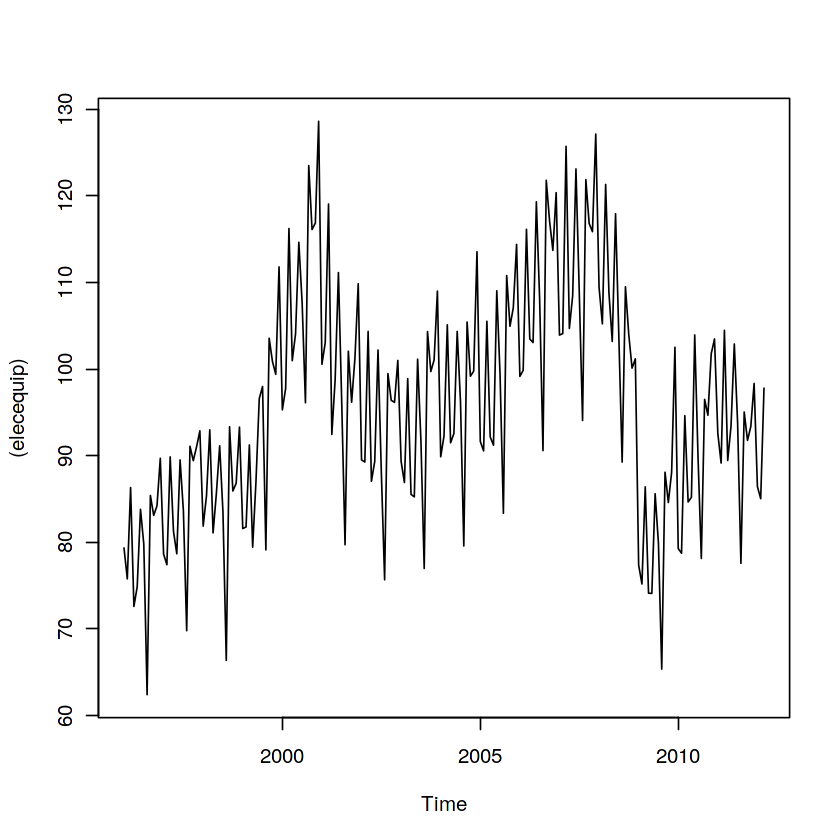

In [9]:
plot((elecequip))

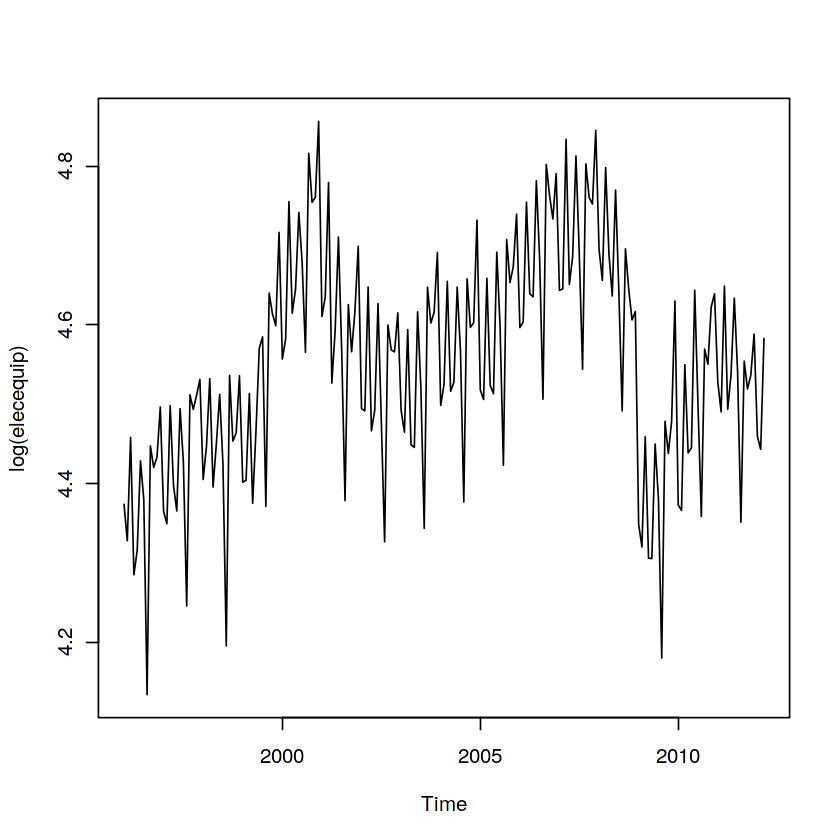

In [10]:
plot(log(elecequip))

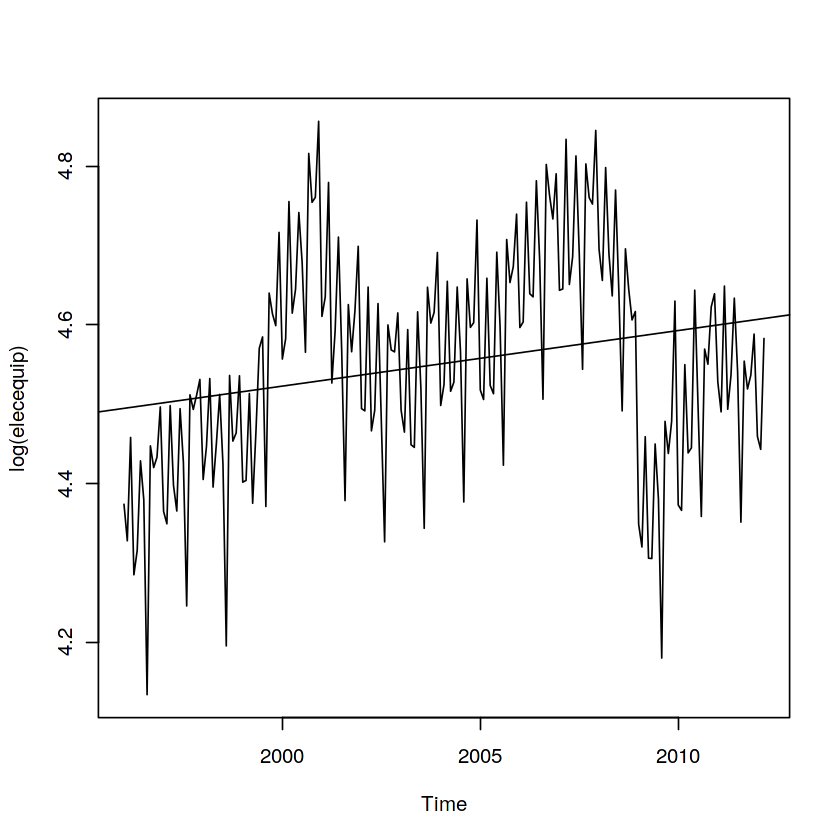

In [11]:
# trend estimation using linear regression
reg=lm(log(elecequip)~time(elecequip))
plot(log(elecequip))
abline(reg)

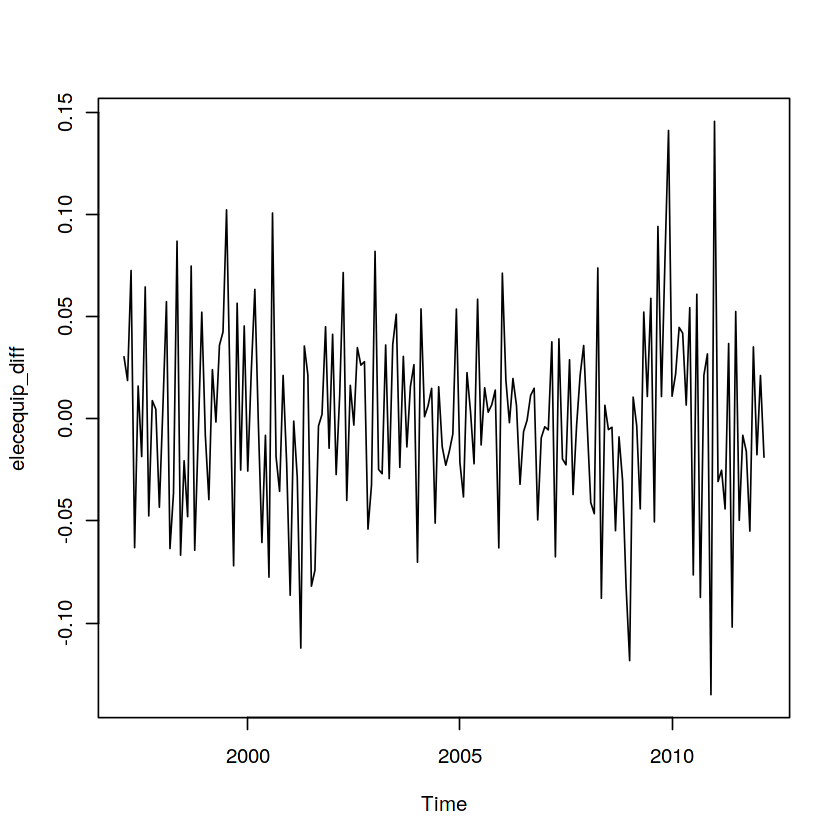

In [12]:
elecequip_diff=diff(diff(log(elecequip),lag =12), differences =1)
plot(elecequip_diff)

In [13]:
# Augmented Dickey-Fuller Test for stationarity
adf.test(elecequip_diff, alternative="stationary", k=0)

Warning message in adf.test(elecequip_diff, alternative = "stationary", k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  elecequip_diff
Dickey-Fuller = -17.392, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [14]:
elecequip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,79.35,75.78,86.32,72.60,74.86,83.81,79.80,62.41,85.41,83.11,84.21,89.70
1997,78.64,77.42,89.86,81.27,78.68,89.51,83.67,69.80,91.09,89.43,91.04,92.87
1998,81.87,85.36,92.98,81.09,85.64,91.14,83.46,66.37,93.34,85.93,86.81,93.30
1999,81.59,81.77,91.24,79.45,86.99,96.60,97.99,79.13,103.56,100.89,99.40,111.80
2000,95.30,97.77,116.23,100.98,104.07,114.64,107.62,96.12,123.50,116.12,116.86,128.61
2001,100.56,103.05,119.06,92.46,98.75,111.14,96.13,79.72,102.07,96.18,101.26,109.85
2002,89.52,89.27,104.35,87.05,89.33,102.20,88.13,75.68,99.48,96.40,96.16,101.00
2003,89.34,86.91,98.90,85.54,85.25,101.14,91.80,76.98,104.33,99.72,101.06,109.00
2004,89.88,92.27,105.11,91.50,92.56,104.35,96.21,79.58,105.43,99.18,99.77,113.55
2005,91.65,90.56,105.52,92.18,91.22,109.04,99.26,83.36,110.80,104.95,107.07,114.40


In [15]:
k=0
x<-ts(elecequip,frequency=12, start=c(1996,1),end=c(2000,12))
x<-tsclean(x,replace.missing=TRUE, lambda='auto')
x_de<-stl(x, "periodic")
x1<-x-x_de$time.series[,2]
fit<-auto.arima(x1)
x_pred<-forecast(fit,3, level = 90)
x_real<-x_pred$mean+x_de$time.series[60+k,2]
write(x_real,file="out_mean_0.csv",append=TRUE,sep=",")
write(x-x_de$time.series[,2]-x_pred$fitted,file="out_error_0.csv",ncolumns=1,sep=",")


k=0
for (j in 1:5)
{
    k<-k+1
    x<-ts(elecequip,frequency=12, start=c(1996,1),end=c(2001,j))
    x<-tsclean(x,replace.missing=TRUE, lambda='auto')
    x_de<-stl(x, "periodic")
    x1<-x-x_de$time.series[,2]
    fit<-auto.arima(x1)
    x_pred<-forecast(fit,3, level = 90)
    x_real<-x_pred$mean+x_de$time.series[60+k,2]
    write(x_real,file=paste("out_mean_",j,'.csv',sep=''),append=TRUE,sep=",")
    write(x-x_de$time.series[,2]-x_pred$fitted,file=paste("out_error",j,'.csv',sep=''),ncolumns=1,sep=",")
}
